# Mittelwert, Varianz und Histogramme

In diesem Kapitel werden wir uns um das Berechnen von Mittelwert, Varianz und Streuung kümmern, sowie dem Plotten von
Histogrammen.

## Der Mittelwert

Der Mittelwert, oder auch arithmetisches Mittel (engl. sample mean), dürfte bereits aus der Schule bekannt sein. Dennoch 
werden wir die Definition hier noch einmal einführen, damit die hier verwendete Notation jedem bekannt ist. Es gilt:

$$
\bar{x} = \frac{1}{N} \sum_{i=1}^N x_i
$$

Wollen wir dies in Python implementieren, so gibt es verschiedene Möglichkeiten. Die erste und wahrscheinlich 
offensichtlichste ist:

In [7]:
def my_mean(ls: list) -> float:
    # speichert die Summe der Einträge
    s = 0.
    # speichert die Länge der Liste
    l = len(ls)

    # aufsummieren der Einträge
    for elem in ls:
        s += elem
    
    # wir teilen die Summe mit der Länge
    # der Liste und geben das Ergebnis zurück
    return s/l

my_list = list(range(11))

my_mean(my_list)

5.0

Dieses Programm ist leicht zu lesen und man sieht genau, was passiert, aber es ist nicht unbedingt die Version, die man in Python bevorzugen sollte. Da das Berechnen einer Summe über ein Liste von Werten etwas sehr alltägliches ist, 
stellt Python dafür eine eingebaute Funktion zur Verfügung. Außerdem sieht man in obigem Programm leicht, dass wir dort 
zwei unnötige Variablen genutzt haben. Implementiert man alle gerade besprochenen Änderungen, so erhält man:

In [8]:
def my_simpler_mean(ls: list) -> float:
    return sum(ls)/len(ls)

my_simpler_mean(my_list)

5.0

Dieser Code ist eindeutig wesentlich aufgeräumter! Man kann dies aber sogar noch einfacher (und schneller) implementieren.
Dafür nutzt man einfach `numpy`. Mit `numpy` sieht dies dann wie folgt aus:

In [9]:
import numpy as np

np.mean(my_list)

5.0

``````{admonition} Eingabe- und Rückgabetypen von Funktionen
:class: info, dropdown
In unseren hier vorgestellten Code-Beispielen haben wir erstmals konkrete Typ-Annotationen genutzt. Diese sagen im
Wesentlichen aus, welche Arten von Parametern an die Funktion übergeben werden sollen und was man als Rückgabe
erwarten darf. Diese dienen (in Python) aber mehr als Dokumentation, da die tatsächlichen Typen **nicht** beachtet werden.
Dennoch ist es sinnvoll, dass man die Typ-Annotationen nutzt, da man dann leichter den Überblick behält.
``````

## Varianz und Streuung

Die Definition der empirischen Varianz lautet:

$$
s^2 = \frac{1}{n-1} \sum_{i=1}^N (x_i - \bar{x})^2
$$

Die Streuung ist lediglich die Wurzel der Varianz, also einfach $s$. Auch hier werden wir wieder die offensichtliche 
Implementierung angeben und dann die `numpy` "Implementierung". Dies sieht dann wie folgt aus:

In [10]:
def my_var(ls: list) -> float:
    # wir brauchen zunächst den Mittelwert
    x_bar = my_mean(ls)

    # zum speichern der Summe
    s_squared = 0.

    # naive Schleife
    for x_i in ls:
        s_squared += (x_i - x_bar)**2

    # zurückgeben des Ergebnisses
    return s_squared / (len(ls) - 1)

Diese Implementierung ist wieder sehr ähnlich zu der naiven Implementierung des Mittelwertes. Allerdings können wir
nicht direkt die verbesserte Version angeben. Denn `sum()` liefert nur die einfache Summe über die Einträge zurück
nicht die quadritische Summe. Allerdings kann man dies einfach umgehen.

In [11]:
def my_simpler_var(ls: list) -> float:
    # wie vorher
    x_bar = my_mean(ls)

    # bessere Implementierung mit list comprehension
    s_squared = sum([(x_i - x_bar)**2 for x_i in ls])

    # Rückgabe des Ergebnisses
    return s_squared / (len(ls) - 1)

# testen beider Funktionen
print(my_var(my_list))
print(my_simpler_var(my_list))

11.0
11.0


In dieser Implementierung haben wir eine sogenannte `list comprehension` genutzt. Dieses Tool ermöglicht es, dass man
aus einer bereits gegebenen Liste eine neue Liste erstellt und gleichzeitig Operationen auf den Elementen ausführt.
Dies haben wir in obigem Beispiel ausgenutzt und haben als Elemente der neuen Liste die $(x_i - \bar{x})^2$ abgespeichert.
Anschließend haben wir dann diese Liste direkt in die Summen Funktion gesteckt und dieses Ergebnis (wie vorher) in
`s_squared` gespeichert. Dadurch konnten wir wieder die Implementierung wesentlich kürzer gestalten. Interessierte können
[hier](https://www.w3schools.com/python/python_lists_comprehension.asp) mehr über die `list comprehension` erfahren.

Die kürzeste Implementierung erfolgt aber natürlich wieder durch `numpy`. Hier erhalten wir:

In [13]:
np.var(my_list, ddof=1)

11.0

Man muss allerdings beachten, dass der Default von `numpy.var()` **keine** Korrektur vornimmt. Deshalb übergeben wir
den Parameter `ddof=1`.

``````{admonition} Korrektur der Varianz
:class: info
In unseren Beispielen haben wir die Varianz mit $\frac{1}{N-1}$ normalisiert. Dies wird üblicherweise gemacht, weil die
Normalisierung mit $\frac{1}{N}$ die Varianz 'unterschätzt'. Wirkliche Auswirkungen hat dies aber natürlich nur für
kleine $N$, weil $\frac{1}{N} \approx \frac{1}{N-1}$, für $N \rightarrow \infty$. Dennoch ist es formal richtiger mit
$\frac{1}{N-1}$ zu normalisieren.
``````

## Histogramme

Histogramme dienen der graphischen Darstellung einer Häufigkeitsverteilung eines Datensatzes. Somit bekommt man einen 
Eindruck davon, welche Werte in einem Datensatz dominant sind. Eine mögliche Anwendung ist z.B. die Visualisierung von
Spektren. Ein Beispiel (mit artifiziellen Daten) sieht in Python wie folgt aus:

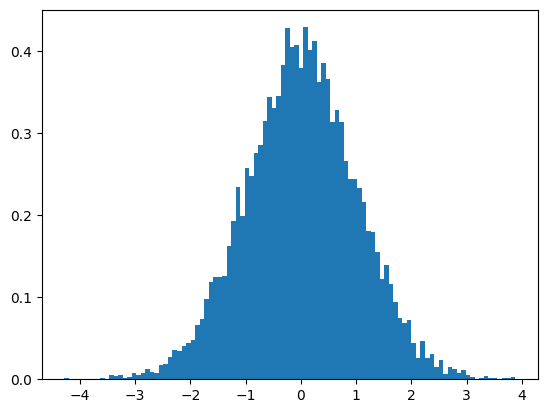

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Generierung unserer Daten
np.random.seed(25763946)
data = np.random.normal(loc=0, scale=1, size=10000)

# Plotten der Daten als Histogramm
num_bins = 100
plt.hist(data, num_bins, density=True)
plt.show()

Als Datensatz haben wir 10.000 normalverteilte Zufallszahlen generiert. Neu ist hierbei, dass wir einen sogenannten `Seed`
benutzt haben. Dieser erlaubt es, dass die Berechnung deterministisch, also reproduzierbar wird.

Im zweiten Teil des Codes haben wir dann festgelegt, wieviele `bins` wir benutzen möchten. Mit `bin` meint man einfach nur
einen Balken im Histogramm. Somit sagt dann die Anzahl der `bins` aus, wieviele solcher Balken in dem Intervall der Daten 
genutzt werden sollen. Zusätzlich haben wir noch das Histogramm normalisiert, sodass die Fläche unter dem Histogramm (also 
das Integral) 1 wird und man damit das Histogramm als Verteilung ansehen kann.

```{admonition} Zufallszahlen in Computern
:class: info, dropdown
Beim Arbeiten mit Zufallszahlen mit Computern muss man immer eine Sache im Hinterkopf behalten: auch wenn immer von 
*Zufallszahlen* gesprochen wird, sind diese **nie** wirklich zufällig, weshalb es richtiger ist von 
*Pseudo*-Zufallszahlen zu sprechen.

Denn man muss hierbei beachten, dass **alle** Vorgänge in einem Computer (sofern man von potenziellen Hardware Bugs 
absieht) immer und zu jedem Zeitpunkt völlig deterministisch sind. Ebenso sind Zufallszahlen-Generatoren determinsitisch 
und produzieren nur *scheinbar* zufällige Zahlen.

Mit diesem Hintergrund wird auch klar, weshalb der oben genannte `Seed` die Berechnung reproduzierbar macht. Denn mit 
dieser Zahl initialisieren wir den Zufallszahlen-Genereator bei jedem Aufruf exakt gleich und erhalten damit bei jeder 
Ausführung das gleiche Ergebnis.
```

Damit ist dieses Kapitel abgeschlossen.